# Gerador de instâncias sintéticas para o problema de otimização do mestrado

### Etapas

**Geral**

1. Definir o grid

1. Definir bacias geológicas

1. Definir plays

1. Definir quantidade de projetos

**Para cada projeto:**

1. Escolher uma bacia

1. Sortear coordenada (x,y)

1. Pela bacia, temos a estratégia e a qualidade do dado

1. Dada a bacia, escolher um play

1. O play vai indicar o range de soterramento, e distribuição dos parâmetros volumétricos

1. O risco tem componentes regionais da bacia (geração), componentes do play (migração, retenção), e componentes individuais (geometria e reservatório).

1. A PCGNA é indicada pelo play

1. Simular volume geo, tec, ambos condicionais e incondicionais

1. O custo do poço exploratório depende da bacia, estratégia e soterramento

1. Cada bacia tem uma $f(vol) \rightarrow VPL$

1. Calcular distribuição de VPL e métricas de retorno (risco?)

1. Atribuir contratos à cada parte da bacia com OEs: simular leilões?

1. Tempo de excecução dos projetos é função do soterramento e estratégia

## Importando bibliotecas

In [1]:
import copy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

%matplotlib inline

## Definição do grid

In [2]:
x_min, x_max = (0., 100.)
y_min, y_max = (0., 100.)
dx, dy = (1., 1.)
grid = np.zeros(( int((y_max-y_min)/dy), int((x_max-x_min)/dx) ))

In [3]:
grid.shape

(100, 100)

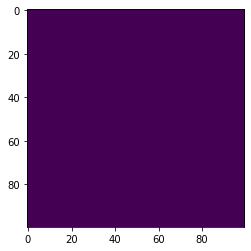

In [4]:
plt.imshow(grid)

## Criando bacias geológicas

In [5]:
estrategias = ['Estrutura pronta', 'Estrutura em construção', 'Nova fronteira']
qualidades_dado = ['Qualidade alta', 'Qualidade razoável', 'Qualidade baixa']

In [6]:
nx_bacias = 3
ny_bacias = 3
bacias = {}
count = 0
x_step = (x_max-x_min)/nx_bacias
y_step = (y_max-y_min)/ny_bacias
for i in range(1, ny_bacias+1):
    y_min_curr = (i-1)*y_step
    y_max_curr = (i)*y_step
    for j in range(1, nx_bacias+1):
        x_min_curr = (j-1)*x_step
        x_max_curr = j*x_step
        count += 1
        bacias["Bacia"+str(count)] = {}
        bacias["Bacia"+str(count)]['Coordenadas'] = ((x_min_curr, x_max_curr),(y_min_curr, y_max_curr))
        bacias["Bacia"+str(count)]['Maturidade'] = np.random.choice(estrategias)
        bacias["Bacia"+str(count)]['Qualidade do dado'] = np.random.choice(qualidades_dado)
        grid[int(x_min_curr):int(x_max_curr), int(y_min_curr):int(y_max_curr)] = count

In [7]:
bacias

{'Bacia1': {'Coordenadas': ((0.0, 33.333333333333336),
   (0.0, 33.333333333333336)),
  'Maturidade': 'Estrutura pronta',
  'Qualidade do dado': 'Qualidade razoável'},
 'Bacia2': {'Coordenadas': ((33.333333333333336, 66.66666666666667),
   (0.0, 33.333333333333336)),
  'Maturidade': 'Estrutura pronta',
  'Qualidade do dado': 'Qualidade alta'},
 'Bacia3': {'Coordenadas': ((66.66666666666667, 100.0),
   (0.0, 33.333333333333336)),
  'Maturidade': 'Estrutura em construção',
  'Qualidade do dado': 'Qualidade baixa'},
 'Bacia4': {'Coordenadas': ((0.0, 33.333333333333336),
   (33.333333333333336, 66.66666666666667)),
  'Maturidade': 'Estrutura em construção',
  'Qualidade do dado': 'Qualidade baixa'},
 'Bacia5': {'Coordenadas': ((33.333333333333336, 66.66666666666667),
   (33.333333333333336, 66.66666666666667)),
  'Maturidade': 'Nova fronteira',
  'Qualidade do dado': 'Qualidade baixa'},
 'Bacia6': {'Coordenadas': ((66.66666666666667, 100.0),
   (33.333333333333336, 66.66666666666667)),
  '

In [8]:
colormap_dict = cm.cmap_d.keys()
colormap_dict

dict_keys(['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 

In [9]:
colormap = cm.inferno

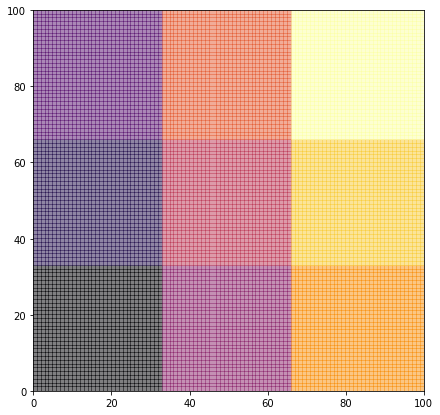

In [10]:
plt.figure(figsize=(7, 7))
plt.pcolormesh(grid, alpha=0.5, cmap=colormap)

## Criando projetos

In [11]:
n_plays = 10
plays = ['Play '+str(i) for i in range(1, n_plays+1)]

In [12]:
n_projetos = 20
projetos = {}
projetos['Coordenada x'] = []
projetos['Coordenada y'] = []
projetos['Bacia'] = []
projetos['Nome'] = []
projetos['Maturidade bacia'] = []
projetos['Qualidade do dado'] = []
projetos['Play'] = []

for i in range(n_projetos):
    
    # primeiro, sortear uma bacia
    bacia = np.random.choice(list(bacias.keys()))
    
    # não permitir coordenadas nas bordas das bacias
    fator = 0.8
    x_min_curr, x_max_curr = bacias[bacia]['Coordenadas'][0]
    y_min_curr, y_max_curr = bacias[bacia]['Coordenadas'][1]
    
    x_proj, y_proj = (np.random.uniform(x_min_curr + x_step*(1-fator), x_max_curr - x_step*(1-fator)), 
                      np.random.uniform(y_min_curr + y_step*(1-fator), y_max_curr - y_step*(1-fator)))
    
    projetos['Nome'].append("Projeto " + str(i+1))
    projetos['Bacia'].append(bacia)
    projetos['Coordenada x'].append(x_proj)
    projetos['Coordenada y'].append(y_proj)
    projetos['Maturidade bacia'].append(bacias[bacia]['Maturidade'])
    projetos['Qualidade do dado'].append(bacias[bacia]['Qualidade do dado'])
    projetos['Play'].append(np.random.choice(plays))

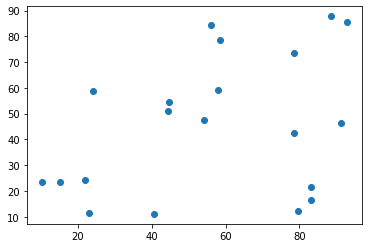

In [13]:
plt.scatter(projetos['Coordenada x'], projetos['Coordenada y'])

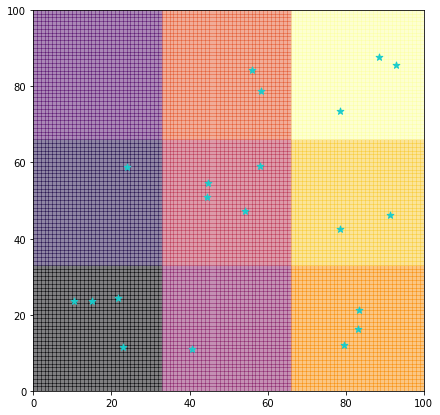

In [14]:
fig = plt.figure(figsize=(7, 7), frameon=False)

im1 = plt.pcolormesh(grid, alpha=0.5, cmap=colormap)
im2 = plt.scatter(projetos['Coordenada x'], projetos['Coordenada y'], color=(0.1, 0.8, 0.8), s=50, marker='*')

plt.show()

In [15]:
proj_df = pd.DataFrame(projetos)

In [16]:
proj_df

,Coordenada x,Coordenada y,Bacia,Nome,Maturidade bacia,Qualidade do dado,Play
0,24.080525,58.871478,Bacia4,Projeto 1,Estrutura em construção,Qualidade baixa,Play 1
1,79.661802,12.131501,Bacia3,Projeto 2,Estrutura em construção,Qualidade baixa,Play 10
2,54.124890,47.380726,Bacia5,Projeto 3,Nova fronteira,Qualidade baixa,Play 8
3,23.078409,11.541866,Bacia1,Projeto 4,Estrutura pronta,Qualidade razoável,Play 9
4,91.214215,46.221654,Bacia6,Projeto 5,Nova fronteira,Qualidade baixa,Play 1
5,55.967579,84.272177,Bacia8,Projeto 6,Nova fronteira,Qualidade baixa,Play 5
6,78.431231,73.639350,Bacia9,Projeto 7,Nova fronteira,Qualidade razoável,Play 8
7,78.528842,42.444719,Bacia6,Projeto 8,Nova fronteira,Qualidade baixa,Play 6
8,44.499362,51.056299,Bacia5,Projeto 9,Nova fronteira,Qualidade baixa,Play 8
9,88.618785,87.773584,Bacia9,Projeto 10,Nova fronteira,Qualidade razoável,Play 5


In [17]:
proj_df['Bacia'].unique(), proj_df['Maturidade bacia'].unique(), proj_df['Qualidade do dado'].unique(), proj_df['Play'].unique()

(array(['Bacia4', 'Bacia3', 'Bacia5', 'Bacia1', 'Bacia6', 'Bacia8',
        'Bacia9', 'Bacia2'], dtype=object),
 array(['Estrutura em construção', 'Nova fronteira', 'Estrutura pronta'],
       dtype=object),
 array(['Qualidade baixa', 'Qualidade razoável', 'Qualidade alta'],
       dtype=object),
 array(['Play 1', 'Play 10', 'Play 8', 'Play 9', 'Play 5', 'Play 6',
        'Play 3'], dtype=object))

## Soterramento, parâmetros volumétricos e risco

In [18]:
soterramento_range = (1000., 5000.)

pcgna_range = (0., 1.)

area_range = (20., 200.)
netpay_range = (5., 100.)
phi_range = (0.10, 0.32)
trapfill_range = (0.5, 1.)
shc_range = (0.5, 1.)
bo_range = (1.4, 1.9)
bg_range = (0.002, 0.004)
rgo_range = (150, 250)
rlg_range = (0.1, 0.15)
froleo_range = (0.15, 0.25)
frga_range = (0.15, 0.25)
frgna_range = (0.15, 0.25)

### TODO: colocar correlação nas variáveis aleatórias

In [19]:
plays_completo = {}
for p in plays:
    plays_completo[copy.copy(p)] = {}
    
    loc, scale = soterramento_range[0], soterramento_range[1]-soterramento_range[0]
    plays_completo[copy.copy(p)]['Soterramento'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = pcgna_range[0], pcgna_range[1] - pcgna_range[0]
    plays_completo[copy.copy(p)]['pcgna'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = area_range[0], area_range[1] - area_range[0]
    plays_completo[copy.copy(p)]['area'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = netpay_range[0], netpay_range[1] - netpay_range[0]
    plays_completo[copy.copy(p)]['netpay'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = phi_range[0], phi_range[1] - phi_range[0]
    plays_completo[copy.copy(p)]['phi'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = trapfill_range[0], trapfill_range[1] - trapfill_range[0]
    plays_completo[copy.copy(p)]['trapfill'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = shc_range[0], shc_range[1] - shc_range[0]
    plays_completo[copy.copy(p)]['shc'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = bo_range[0], bo_range[1] - bo_range[0]
    plays_completo[copy.copy(p)]['bo'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = bg_range[0], bg_range[1] - bg_range[0]
    plays_completo[copy.copy(p)]['bg'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = rgo_range[0], rgo_range[1] - rgo_range[0]
    plays_completo[copy.copy(p)]['rgo'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = rlg_range[0], rlg_range[1] - rlg_range[0]
    plays_completo[copy.copy(p)]['rlg'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = froleo_range[0], froleo_range[1] - froleo_range[0]
    plays_completo[copy.copy(p)]['froleo'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = frga_range[0], frga_range[1] - frga_range[0]
    plays_completo[copy.copy(p)]['frga'] = stats.uniform(loc, scale).rvs(2)
    
    loc, scale = frgna_range[0], frgna_range[1] - frgna_range[0]
    plays_completo[copy.copy(p)]['frgna'] = stats.uniform(loc, scale).rvs(2)

In [20]:
plays_completo

{'Play 1': {'Soterramento': array([3003.75238951, 1151.44684427]),
  'pcgna': array([0.51679858, 0.87280035]),
  'area': array([ 86.09500718, 128.06531223]),
  'netpay': array([35.60826878, 95.44200758]),
  'phi': array([0.28164789, 0.1661589 ]),
  'trapfill': array([0.89539601, 0.83225817]),
  'shc': array([0.53287984, 0.78520939]),
  'bo': array([1.45146393, 1.41727544]),
  'bg': array([0.00361341, 0.00206423]),
  'rgo': array([185.22021758, 175.29669374]),
  'rlg': array([0.1133822 , 0.13976284]),
  'froleo': array([0.15286426, 0.19561037]),
  'frga': array([0.24581927, 0.24405006]),
  'frgna': array([0.2353974, 0.197904 ])},
 'Play 2': {'Soterramento': array([2885.89060893, 2054.66028535]),
  'pcgna': array([0.27141278, 0.13341781]),
  'area': array([ 76.24995741, 120.27570609]),
  'netpay': array([18.21240643, 69.89560091]),
  'phi': array([0.19353718, 0.22228176]),
  'trapfill': array([0.54932274, 0.63749195]),
  'shc': array([0.9106512 , 0.66092352]),
  'bo': array([1.72262935, 

### TODO: scalar incerteza pela qualidade do dado e maturidade da bacia

In [21]:
def ComputeDist(p90_play, p10_play):
    loc, scale = p90_play, p10_play - p90_play
    p90_proj, p10_proj = sorted(stats.uniform(loc, scale).rvs(2))
    mu = (np.log(p90_proj) + np.log(p10_proj)) / 2
    sigma = (np.log(p10_proj)-mu) / 1.2815515655446
    dist = stats.lognorm(s=sigma, scale=np.exp(mu))
    return dist

projetos['Soterramento'] = []
projetos['pcgna'] = []
projetos['area'] = []
projetos['netpay'] = []
projetos['phi'] = []
projetos['trapfill'] = []
projetos['shc'] = []
projetos['bo'] = []
projetos['bg'] = []
projetos['rgo'] = []
projetos['rlg'] = []
projetos['froleo'] = []
projetos['frga'] = []
projetos['frgna'] = []
projetos['geração'] = []
projetos['migração'] = []
projetos['reservatório'] = []
projetos['geometria'] = []
projetos['retenção'] = []
projetos['PS HC'] = []

for k, p in enumerate(projetos['Nome']):
    
    play = projetos['Play'][k]
    
    soterr_p90_play, soterr_p10_play = sorted(plays_completo[play]['Soterramento']) # soterramento
    pcgna_p90_play, pcgna_p10_play = sorted(plays_completo[play]['pcgna']) # pcgna 
    area_p90_play, area_p10_play = sorted(plays_completo[play]['area']) # area
    netpay_p90_play, netpay_p10_play = sorted(plays_completo[play]['netpay']) # netpay 
    phi_p90_play, phi_p10_play = sorted(plays_completo[play]['phi']) # phi 
    trapfill_p90_play, trapfill_p10_play = sorted(plays_completo[play]['trapfill']) # trapfill 
    shc_p90_play, shc_p10_play = sorted(plays_completo[play]['shc']) # shc 
    bo_p90_play, bo_p10_play = sorted(plays_completo[play]['bo']) # bo 
    bg_p90_play, bg_p10_play = sorted(plays_completo[play]['bg']) # bg 
    rgo_p90_play, rgo_p10_play = sorted(plays_completo[play]['rgo']) # rgo 
    rlg_p90_play, rlg_p10_play = sorted(plays_completo[play]['rlg']) # rlg 
    froleo_p90_play, froleo_p10_play = sorted(plays_completo[play]['froleo']) # froleo 
    frga_p90_play, frga_p10_play = sorted(plays_completo[play]['frga']) # frga 
    frgna_p90_play, frgna_p10_play = sorted(plays_completo[play]['frgna']) # frgna
    
    loc, scale = soterr_p90_play, soterr_p10_play - soterr_p90_play
    soterramento = stats.uniform(loc, scale).rvs(1)[0]
    projetos['Soterramento'].append(soterramento)
    
    loc, scale = pcgna_p90_play, pcgna_p10_play - pcgna_p90_play
    pcgna = stats.uniform(loc, scale).rvs(1)[0]
    projetos['pcgna'].append(pcgna)
    
    # area
    area_dist = ComputeDist(area_p90_play, area_p10_play)
    projetos['area'].append(area_dist)
    # netpay
    netpay_dist = ComputeDist(netpay_p90_play, netpay_p10_play)
    projetos['netpay'].append(netpay_dist)
    # phi
    phi_dist = ComputeDist(phi_p90_play, phi_p10_play)
    projetos['phi'].append(phi_dist)
    # trapfill
    trapfill_dist = ComputeDist(trapfill_p90_play, trapfill_p10_play)
    projetos['trapfill'].append(trapfill_dist)
    # shc
    shc_dist = ComputeDist(shc_p90_play, shc_p10_play)
    projetos['shc'].append(shc_dist)
    # bo
    bo_dist = ComputeDist(bo_p90_play, bo_p10_play)
    projetos['bo'].append(bo_dist)
    # bg
    bg_dist = ComputeDist(bg_p90_play, bg_p10_play)
    projetos['bg'].append(bg_dist)
    # rgo
    rgo_dist = ComputeDist(rgo_p90_play, rgo_p10_play)
    projetos['rgo'].append(rgo_dist)
    # rlg
    rlg_dist = ComputeDist(rlg_p90_play, rlg_p10_play)
    projetos['rlg'].append(rlg_dist)
    # froleo
    froleo_dist = ComputeDist(froleo_p90_play, froleo_p10_play)
    projetos['froleo'].append(froleo_dist)
    # frga
    frga_dist = ComputeDist(frga_p90_play, frga_p10_play)
    projetos['frga'].append(frga_dist)
    # frgna
    frgna_dist = ComputeDist(frgna_p90_play, frgna_p10_play)
    projetos['frgna'].append(frgna_dist)
    
    geracao = stats.uniform(0.4, 0.6).rvs(1)[0]
    projetos['geração'].append(geracao)
    migracao = stats.uniform(0.4, 0.6).rvs(1)[0]
    projetos['migração'].append(migracao)
    reservatorio = stats.uniform(0.4, 0.6).rvs(1)[0]
    projetos['reservatório'].append(reservatorio)
    geometria = stats.uniform(0.4, 0.6).rvs(1)[0]
    projetos['geometria'].append(geometria)
    retencao = stats.uniform(0.4, 0.6).rvs(1)[0]
    projetos['retenção'].append(retencao)
    projetos['PS HC'].append( geracao*migracao*reservatorio*geometria*retencao )
    

In [22]:
proj_df = pd.DataFrame(projetos)

In [23]:
proj_df.head()

,Coordenada x,Coordenada y,Bacia,Nome,Maturidade bacia,Qualidade do dado,Play,Soterramento,pcgna,area,...,rlg,froleo,frga,frgna,geração,migração,reservatório,geometria,retenção,PS HC
0,24.080525,58.871478,Bacia4,Projeto 1,Estrutura em construção,Qualidade baixa,Play 1,2555.611043,0.596812,<scipy.stats._distn_infrastructure.rv_frozen o...,...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,0.775768,0.770013,0.644533,0.779024,0.674087,0.202182
1,79.661802,12.131501,Bacia3,Projeto 2,Estrutura em construção,Qualidade baixa,Play 10,4652.085498,0.120438,<scipy.stats._distn_infrastructure.rv_frozen o...,...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,0.429248,0.414746,0.897625,0.477152,0.571561,0.043582
2,54.124890,47.380726,Bacia5,Projeto 3,Nova fronteira,Qualidade baixa,Play 8,1415.409097,0.502398,<scipy.stats._distn_infrastructure.rv_frozen o...,...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,0.786582,0.987764,0.877005,0.494674,0.784539,0.264444
3,23.078409,11.541866,Bacia1,Projeto 4,Estrutura pronta,Qualidade razoável,Play 9,3140.922807,0.439772,<scipy.stats._distn_infrastructure.rv_frozen o...,...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,0.697137,0.522536,0.698181,0.529492,0.600028,0.080804
4,91.214215,46.221654,Bacia6,Projeto 5,Nova fronteira,Qualidade baixa,Play 1,2174.484362,0.747698,<scipy.stats._distn_infrastructure.rv_frozen o...,...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...,0.888008,0.960498,0.666087,0.686996,0.417818,0.163074


In [24]:
proj_df[['geração', 'migração', 'reservatório', 'geometria', 'retenção', 'PS HC']].describe()

,geração,migração,reservatório,geometria,retenção,PS HC
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.703940,0.715395,0.725309,0.656407,0.693307,0.170807
std,0.184403,0.184848,0.139132,0.155846,0.153215,0.095738
min,0.429248,0.408402,0.476117,0.415225,0.417818,0.043582
25%,0.567038,0.587228,0.660698,0.520788,0.585481,0.079965
50%,0.690249,0.724767,0.724830,0.699635,0.674391,0.179544
75%,0.849949,0.850691,0.822382,0.763083,0.789868,0.216590
max,0.997101,0.988001,0.951047,0.963311,0.997906,0.409617


In [25]:
list(projetos.keys())

['Coordenada x',
 'Coordenada y',
 'Bacia',
 'Nome',
 'Maturidade bacia',
 'Qualidade do dado',
 'Play',
 'Soterramento',
 'pcgna',
 'area',
 'netpay',
 'phi',
 'trapfill',
 'shc',
 'bo',
 'bg',
 'rgo',
 'rlg',
 'froleo',
 'frga',
 'frgna',
 'geração',
 'migração',
 'reservatório',
 'geometria',
 'retenção',
 'PS HC']

## Simulação dos volumes condicionais e incondicionais

In [26]:
iteracoes = 100

for k in range(n_projetos):
    
    projetos['volume condicional'] = []
    projetos['média condicional'] = []
    projetos['volume incondicional'] = []
    projetos['média incondicional'] = []
    
    volume_condicional = []
    volume_incondicional = []
    
    for i in range(iteracoes):
        
        # sortear se é uma descoberta
        descoberta = stats.uniform(0, 1).rvs(1)[0] < projetos['PS HC'][k]
        
        # se for descoberta, sortear o flúido principal
        
        
        # dado o flúido principal, calcular volumes
        
        

False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
True
False
True
False
False
False
True
True
False
True
False
True
False
False
False
True
True
False
False
False
False
True
True
False
False
False
False
True
False
False
False
False
True
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
Fal

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
True
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
True
False
False
Fa